<a href="https://colab.research.google.com/github/mervebudakk/python/blob/main/08_Canny_Kenar_Belirleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. CANNY KENAR BELİRLEME

Canny kenar belirleme algoritması; görüntüde keskin olarak belirlenmiş kenarları bulmak için John F. Canny tarafından geliştirilmiş ve aşamaları olan bir algoritmadır. Kenar bulmada son derece etkin olarak kullanılan bir algoritmadır. Aşamaları maddeleyecek olursa; Görüntünün gürültülerini azaltmak amacıyla Gaussian çekirdekle konvolüsyon alınarak azaltılır. Gaussian filtre dışında Mean ya da Medyan filtrede kullanılabilir. . Gradyan operatörü uygulanır. Bu şekilde görüntünün Gradyan büyüklüğü ve yönü hesaplanır. Bu işlem için Sobel filtresi en çok kullanılan yöntemdir. Bunun dışında Prewitt ve Robert kenar bulma metotları da mevcuttur. . Kenarlar Non Maxima baskılama kullanılarak incelemeye alınır. . İkili eşikleme uygulanır bu şekilde istenmeyen ayrıntılardan arındırılma işlemi gerçekleştirilir. . Güçlü-zayıf ayrımı yapıldıktan sonra baskılama uygulanır ve asıl kenarlarla görüntüye son hali verilir.

##1.1. Gaussian Filtresi

Kenar bulma işlemi için görüntüde yumuşatma yapılmalıdır. Gaussian filtresi görüntüleri bulanıklaştırmak/yumuşatmak ve görüntü üzerindeki gürültüyü arındırmak için kullanılır.

Gaussian fonksiyonu:


In [1]:
#Google Drive'ınızı bağlamak için kullanılır.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


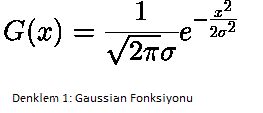

In [2]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Resource/canny_formul.png")

Denklemde kullanılan σ değeri dağılımın standart sapmadır. Dağılımın ortalama 0 değere sahip olduğu varsayılmaktadır.

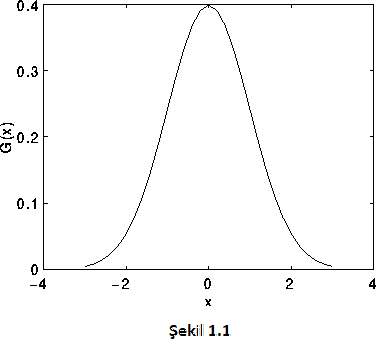

In [3]:
Image(filename="/content/drive/My Drive/Resource/canny_formul2.png")

Gauss dağılımının grafiği Şekil 1.1’de gösterilmektedir.

Gaussian fonksiyonu için önemli olabilecek bazı değerler tabloda gösterilmiştir.


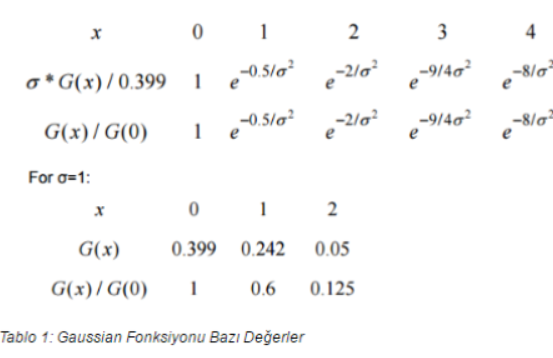

In [4]:
Image(filename="/content/drive/My Drive/Resource/canny_formul3.png")

Gaussian fonksiyonu birçok araştırma alanında kullanılmaktadır:

* Gürültü veya bir veri için olasılık dağılımı tanımlar.

* Yumuşatma için kullanılan bir operatördür.

* Matematikte kullanılır.

* Gaussian görüntü işlemede çalışılırken 2 boyutlu Gaussian fonksiyonuna ihtiyaç duyulmaktadır.





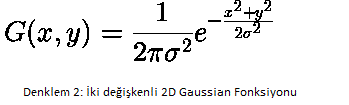

In [5]:
Image(filename="/content/drive/My Drive/Resource/canny_formul4.png")

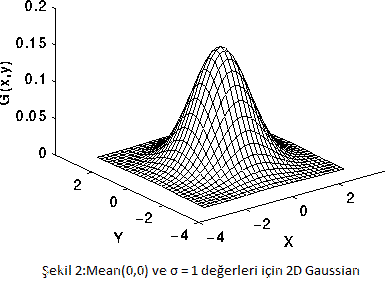

In [6]:
Image(filename="/content/drive/My Drive/Resource/canny_formul5.png")

Gaussian filtresi 2D dağılımını nokta yayılımını kullanarak çalışır. Bu konvolüsyon ile sağlanır. Gaussian filtrenin görüntü üzerinde uygulaması basitçe şu şekilde gösterilebilir. Önemli ayrıntı işlem gerçekleştirilirken kenarlıklar üzerinde gerçekleştirilmez.

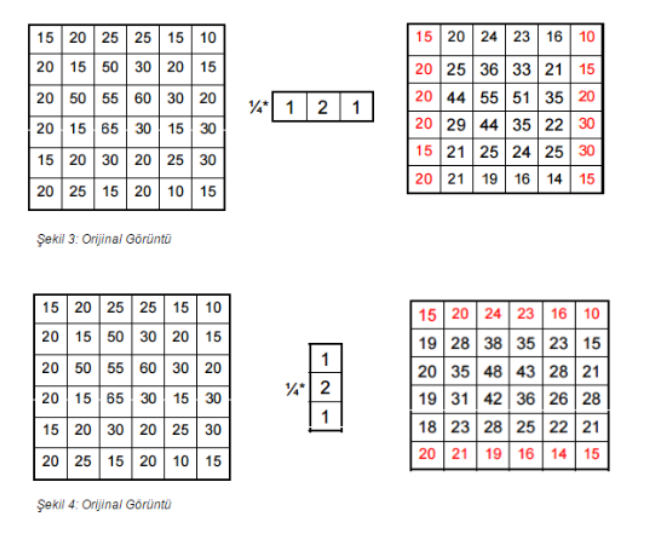

In [7]:
Image(filename="/content/drive/My Drive/Resource/canny_formul6.png")

## 1.2 Mean Filtresi

Mean filtresi alçak geçiren filtre olarak çalışmaktadır. Alçak geçiren filtre belirli bir frekansın üzerinde kalan sinyallerin işlenmesini sağlayan filtredir. Mean filtrenin çalışma mantığı; pencerede bulunan piksel değerinin diğer tüm piksel değerlerinin ortalaması ile değiştirerek çalışır. Pencere genellikle karedir yani matris olarak düşünülürse nxn boyutunda kare matristir. Filtrenin çalışma mantığı bir örnekle gösterilecek olursa:

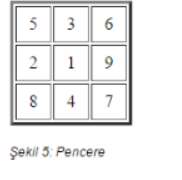

In [8]:
Image(filename="/content/drive/My Drive/Resource/canny_formul7.png")

Pencerede yer alan değerlerin ortalaması hesaplanır.

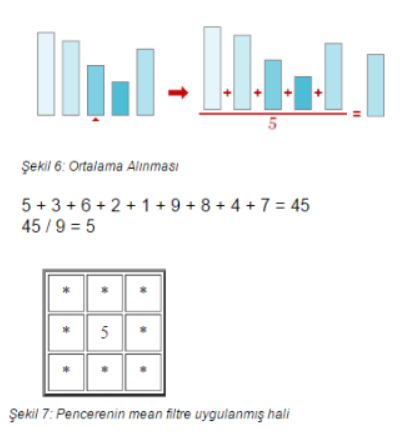

In [9]:
Image(filename="/content/drive/My Drive/Resource/canny_formul8.png")

##1.3.Gradyan Operatörünün Bulunması
Kenarların belirlenmesinde 3 adet işleç kullanılmaktadır. Sobel işleci, Prewitt işleci ve Robert işleçleridir.


##1.3.1. Sobel İşleci

Sayısal bir görüntü, bir fonksiyon olarak değerlendirildiğinde, bir nokta üzerindeki gradyan değerinin, 3×3 komşulukta mümkün olan dört merkezi yönde elde edilebilir gradyan değerlerinin vektör toplamları şeklinde oluşturulması düşüncesine dayanmaktadır.

Bu gradyan değerlerinin vektör toplamları; gradyan ölçümleri üzerinde ortalama değer bulunmasını sağlamaktadır. 3×3’lük komşuluk için merkez noktanın gradyan değeri, dik vektör çiftlerinin vektör toplamları olarak bulunmaktadır.
Sobel işlecinde iki adet konvolüsyon çekirdeği yer alır. Bunlar görüntü içerisindeki ani ışık yoğunluk değişimi olan yerlerin belirlenmesini sağlar.

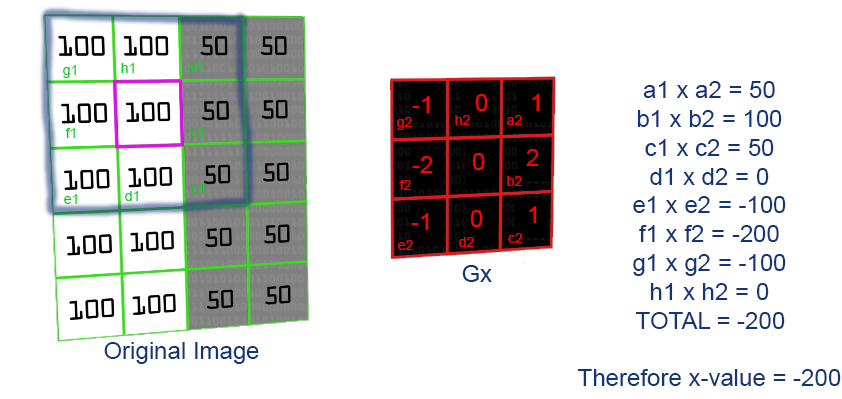

In [ ]:
Image(filename="/content/drive/My Drive/Resource/canny_formul9.png")

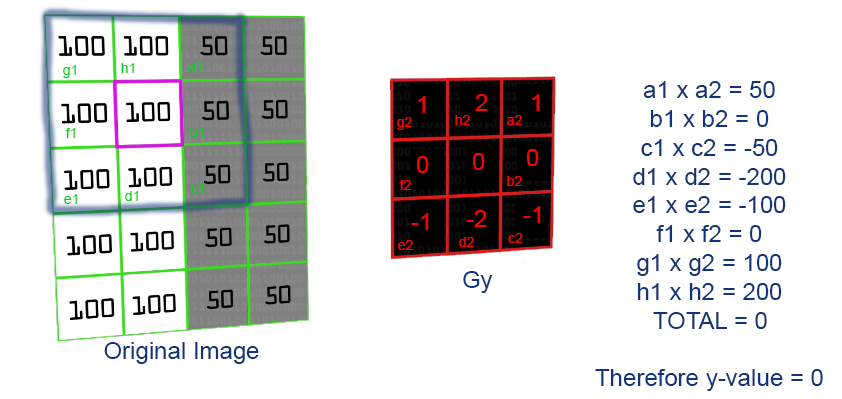

In [ ]:
Image(filename="/content/drive/My Drive/Resource/canny_formul10.png")

##1.3.2 Prewitt İşleci

Sobel işleci gibi düşey ve yatay keskinlik sağlamaktadır. Sobel işlece göre daha basittir ama sonucunu değerlendirecek olursak biraz daha gürültü içermektedir.

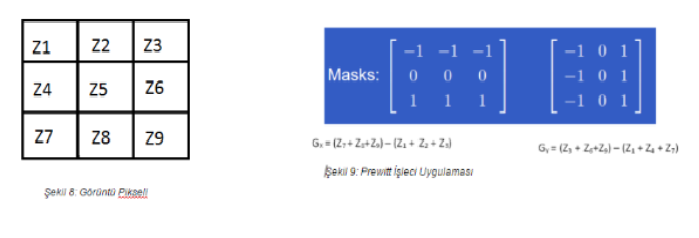

In [10]:
Image(filename="/content/drive/My Drive/Resource/canny_formul11.png")

##1.3.3. Robert İşleci
Görüntü işlemede kullanılan en eski işleçtir. Bu işleçle sadece yatay ya da sadece düşey olarak kenarlar elde edilmektedir. Hızlı ve basit bir uygulamaya sahip olduğundan gerçek zamanlı uygulamalarda çokça tercih edilmektedir.


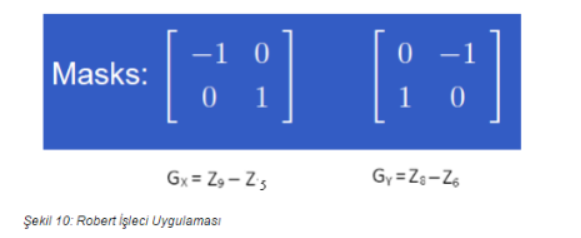

In [11]:
Image(filename="/content/drive/My Drive/Resource/canny_formul12.png")

Sırasıyla: Matematiksel hesaplanması gösterilirse, Konvolüsyon uygulandıktan sonra,2x2 boyutunda iki adet Gradyan operatörü elde edilmiştir.

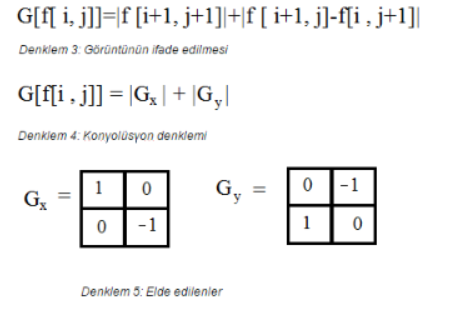

In [ ]:
Image(filename="/content/drive/My Drive/Resource/canny_formul13.png")

##1.4. Kenar İnceltme
İşleçler ile elde edilen görüntülerde kenarlar kalındır. Kenarların bir piksel gibi ince gösterilmesi için çeşitli metotlar geliştirilmiştir. Bu yöntemlerden en başarılısı maksimum olmayan piksel değerlerinin bastırılması yöntemidir.
Çalışma mantığına bakılacak olursa; görüntü, görüntünün gradyanı yönünde taranır ve pikseller yerel maksimumun parçası değillerse sıfıra ayarlanır.
Gradyan Operatörünün Büyüklüğü:


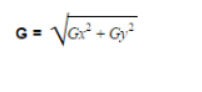

In [ ]:
Image(filename="/content/drive/My Drive/Resource/canny_formul15.png")

Gradyan Türevinin Yönü: θ = arctan(Gy /Gx) ifade edilir.
Gradyan Yönü: arctan(Gy /Gx) ile tayin edilmektedir.
Her bir piksel için gradyan yönü hesaplandıktan sonra, elde edilen açı değeri istikametindeki iki ilave komşu piksel seçilerek, ortanca pikselin bunlardan yüksek değerde olması istenir. Bu şart sağlanmaz ise, ortanca piksel sıfıra çekilerek kenar resminden elenir. Bu şekilde, kenar resminde sadece kenarlara dik yönde maksimum gradyan değerlerine sahip olan pikseller bırakılır.


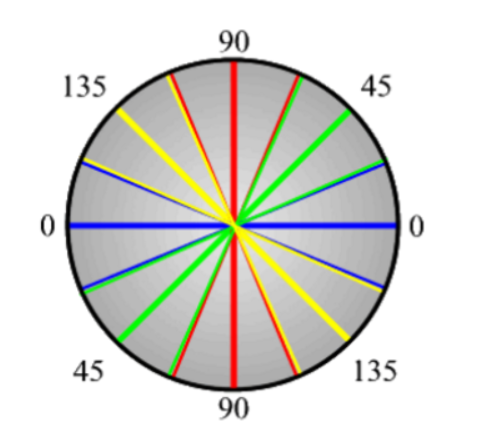

In [12]:
Image(filename="/content/drive/My Drive/Resource/canny_formul14.png")

Bulunan Gradyan operatörünün komşuluğunun incelenmesi için öncelikle, açı değerlerinin belirlenmesi gereklidir. Bunun için de kenar ayrımlarını saptayacağımız renk açılarını kullanmalıyız. Her renk değeri belirli aralıklar içerisinde kalır. Bunları şöyle bir formül ile hesaplayacağız.Sarı aralıktaki herhangi bir kenar yönü 0 derece olarak ayarlanır. Yeşil yönde düşen herhangi bir kenar yönü 45 dereceye ayarlanır. Mavi aralıktaki herhangi bir kenar yönü 90 dereceye ayarlanır. Son olarak, kırmızı yönde kalan herhangi bir kenar yönü 135 dereceye ayarlanır.


##1.5. İkili Eşikleme Ve Kenar Ayrımı
Gradyan genlik resminin belirli bir aralığa normalize edilmesi ve kenarların diki boyunca maksimum olmayanların bastırılması sonrasında elde edilen kenar resmi, piksel sürekliliği aşamasına girer. Kenar resmindeki piksel sürekliliğinin test edilmesi amacıyla yüksek ve düşük seviyede iki eşik değeri
kullanılır. Süreklilik testi için şu adımlar uygulanır:

-Yüksek ve düşük seviye olmak üzere iki adet eşik seviyesi belirlenir.

-Her bir nokta için Eğer kenara dik maksimum gradyan genliği (piksel değeri) yüksek eşikten yüksek ise, kenar olarak bırakılır.

-Eğer kenara dik maksimum gradyan genliği düşük eşikten düşük ise, sıfıra çekilir.

-Eğer, piksel değeri, yüksek ve düşük eşik arasında ise, bu pikselin yüksek eşiği aşan bir komşusu var ise kenar olarak kalmasına izin verilir.

-Eğer ki eşiği aşan bir komşusu yok ise sıfıra çekilerek kenar resminden elenir.


##1.6.Canny Kenar Belirlemenin Görüntüye Uygulanması


In [13]:
from PIL import Image
#PIL modülünden Image kütüphanesi eklenmiştir.

import math
#Yapılacak matematik işlemleri için math kütüphanesi eklenmiştir.

import numpy
#numpy kütüphanesi eklenmiştir.


In [14]:
image = Image.open("/content/drive/My Drive/Resource/cicek.jpg")
#image değişkeninin içerisine belirtilen klasörde bulunan canny adlı resim dosyasına atılır.

newmat = image.load()
#newmat image yeni bir matris oluşturulur ve bunun içerisine resim dosyası yüklenir.

wdh = image.size[0]
#wdh değişkenine resim dosyasının genişlik boyutu atılır.

hgh = image.size[1]
#hgh değişkenine resim dosyasının yükseklik boyutu atılır.


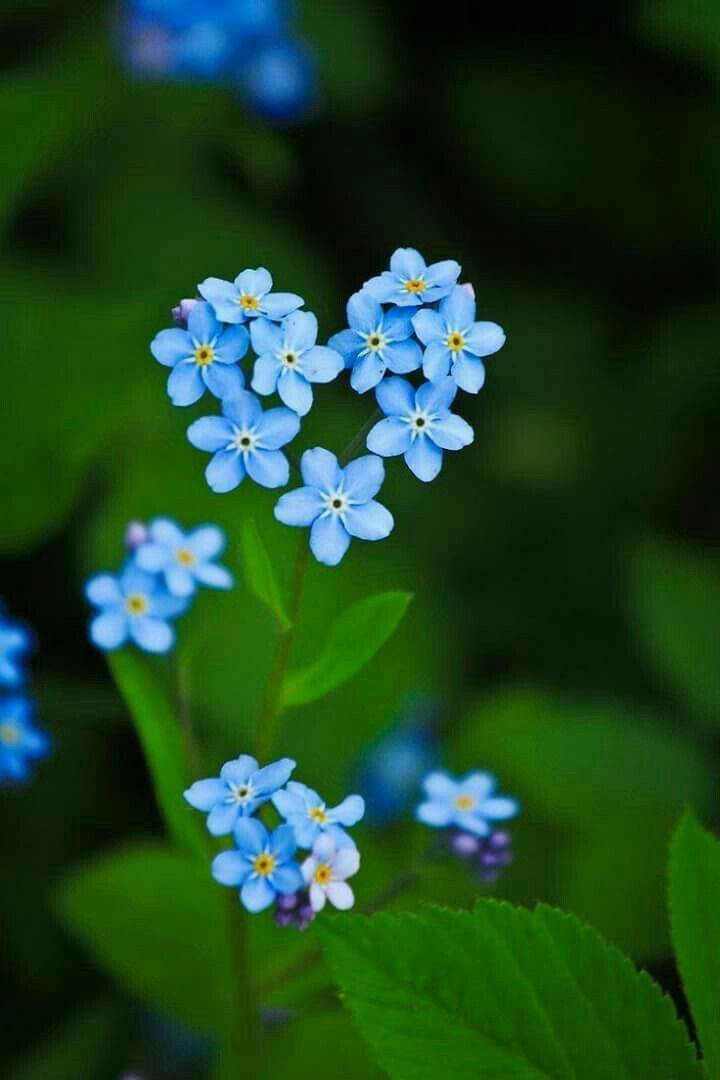

In [15]:
#@title dosyanın orjinal hali
display(image)

In [17]:
graylist = [ [0] * hgh for x in range(wdh) ]

#graylist adında tanımlanan matrisin boyutunu yukarıda alınan  resim dosyasının  genişlik ve yükseklik değerlerine göre belirlenir.

for k in range (wdh):

#Resim dosyasını  gri tonlarına çevirmek için iç içe döngü ile matrise çekilir. Böylece her bir piksel birer matris elemanı olacaktır.

     for l in range (hgh):

          r, g, b = image.getpixel((k, l))

#Her pikselde birer r(kırmızı), g(yeşil), b(mavi) değeri bulunmaktadır. Bunlar o piksele renk veren kodlardır. Öncelikle ‘getpixel’  fonksiyonu ile bu değerler r,g,b değişkenlerine atılır.

          gray = (int)((r*0.2126)+(g*0.7152)+(b*0.0722))

#Resmi gri yapacak olan sayısal değeri elde etmek için, insan gözünün gama ışınlarını algılama oranlarına göre oluşturulan formül ile alınan  katsayıları r,g,b değişkenleriyle çarpıp toplanır. Böylece resimdeki her piksel için ayrı bir gri renk tonu elde etmiş olunur.

          graylist [k] [l] = gray

#graylist matrisinin her elemanına ağırlık toplama yöntemi ile bulunan gri değeri kaydedilir.
          newmat[k,l] = (gray,gray,gray)

#Resim dosyası yüklenen matrisin tüm elemanlarına(piksellerine) ağırlık toplama yöntemine göre bulunan  gri renk kodu atılır. Böylece resmin her pikseli renk tonuna göre gri rengini almış olacaktır. Burada kırmızı, yeşil, mavi renk tonlarının hepsine aynı değeri atılır. Bu yöntem gri rengini elde edilmesini  sağlar.

image.save("/content/drive/My Drive/Resource/cicek_gray.bmp")

#Artık gri tonlarında olan resim belirtilen dosyasının içine .bmp uzantılı olarak kaydedilir.

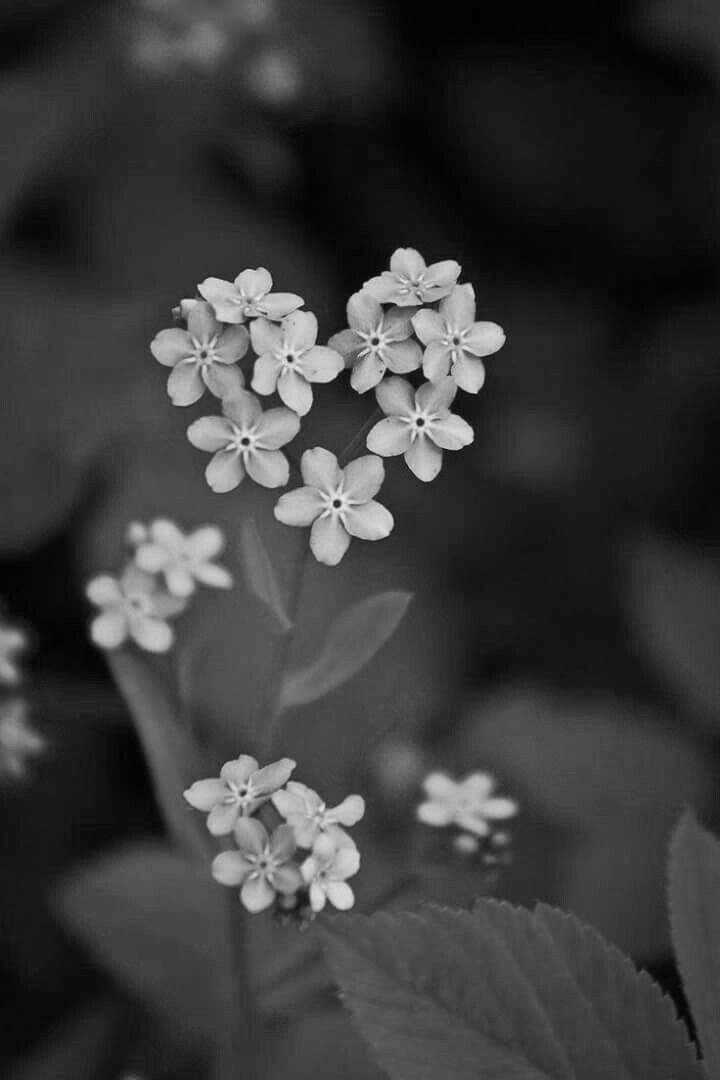

In [18]:
#@title cicek_gray.bmp  dosyasının yeni hali
display(image)

In [19]:
grayimage=Image.open("/content/drive/My Drive/Resource/cicek_gray.bmp")

#Kaydedilen resim dosyası tekrar açılır.

mean_im = grayimage.load()

#Açtığımız resim dosyasını mean_im adlı değişkene yüklüyoruz.

meanArray = [ [0]*hgh for x in range (wdh)]

#Resim dosyasının boyutu kadar bir boş matris oluşturulur. Bu matris ile Mean filtresi resme uygulanır.

for i in range (1,hgh-1):

#Matris elemanlarına erişmek için iç içe döngüler kullanılır.

     for j in range (1,wdh-1):

#Mean filtresi resmin her pikseli yani oluşturulan matrisin her elemanına gri olan resmin sırasıyla tüm piksellerini toplayıp bölerek orta bir değer atar.

       meanArray[j][ i] = (graylist[j][i - 1]
          + graylist[j][i + 1]
          + graylist[j][i]
          + graylist[j - 1][ i - 1]
          + graylist[j - 1][i + 1]
          + graylist[j - 1][ i]
          + graylist[j + 1][i - 1]
          + graylist[j + 1][i + 1]
          + graylist[j + 1][ i] ) / 9;

       mean_value = (int)(round(meanArray[j][i]))

#Bulunan değer yuvarlanır ve yüklenen resme işlenir.
       mean_im[j,i] = (mean_value,mean_value,mean_value)

grayimage.save("/content/drive/My Drive/Resource/cicek_mean.bmp")

#Mean filtresinden geçen resim belirlenen dosyaya kaydedilir.


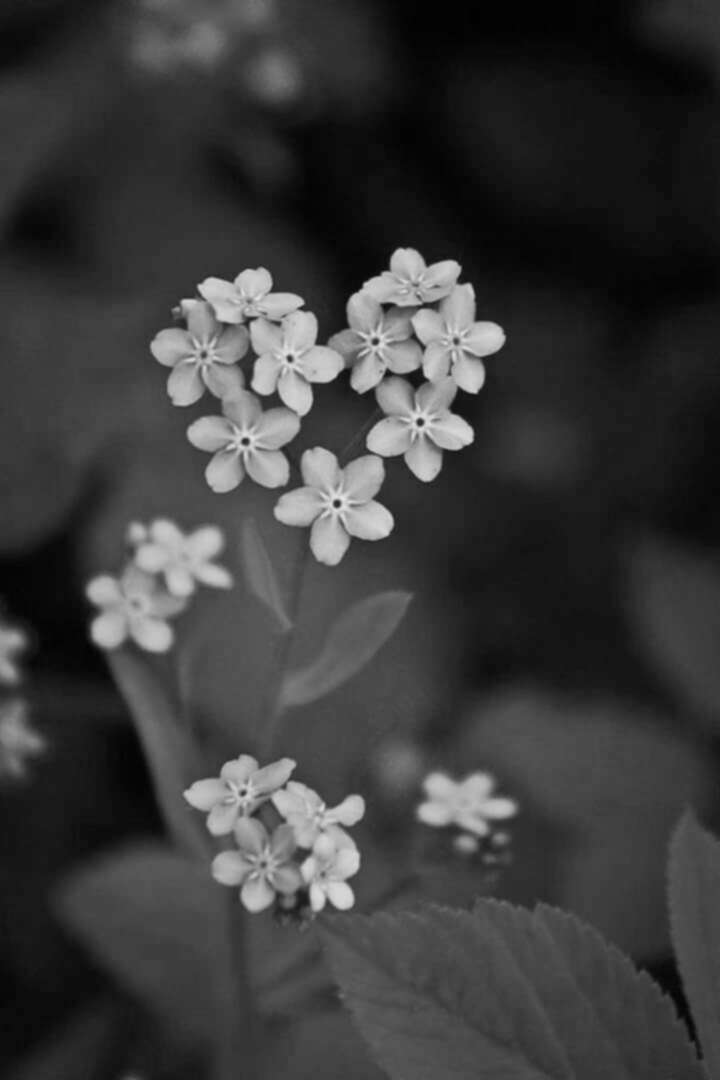

In [20]:
#@title canny_mean.bmp  dosyasının yeni hali
display(grayimage)

In [21]:
meanimage=Image.open("/content/drive/My Drive/Resource/cicek_mean.bmp")

#Kaydedilen resim tekrar açıp bir matrise yüklenir.

robert_im=meanimage.load()

robertArray = [ [0]*hgh for x in range(wdh)]

robert_x=[[2,1,0],
          [1,0,-1],
          [0,-1,-2]]

#Kenar bulma işleçlerinden olan Robert işleci ile kenarları diagonal olarak taramak için iki matris oluşturulur.


robert_y=[[0,-1,-2],
          [1,0,-1],
          [2,1,0]]

for m in range (1,hgh-1):

#İç içe döngüler ile matrisin her elemanına raporda belirtilen Robert kenar bulma formülünü uyguluyoruz.

     for n in range (1,wdh-1):

          robertArray[n][m]=(int)(math.fabs(graylist[n][m] - graylist[n - 1][m - 1])) +    (int)(math.fabs(graylist[n][m - 1] - graylist[n - 1][m]))

          rbrt_value=int(round(robertArray[n][m]))

#Bulunan değer yuvarlanır ve bir değişkene atılır.

          robert_im[n,m] = (rbrt_value,rbrt_value,rbrt_value)

#Son olarak bulunan değer resim matrisine işlenir.

meanimage.save("/content/drive/My Drive/Resource/cicek_robert.bmp")

#Robert kenar bulma işleminden geçen resim belirlenen dosyaya kaydedilir.

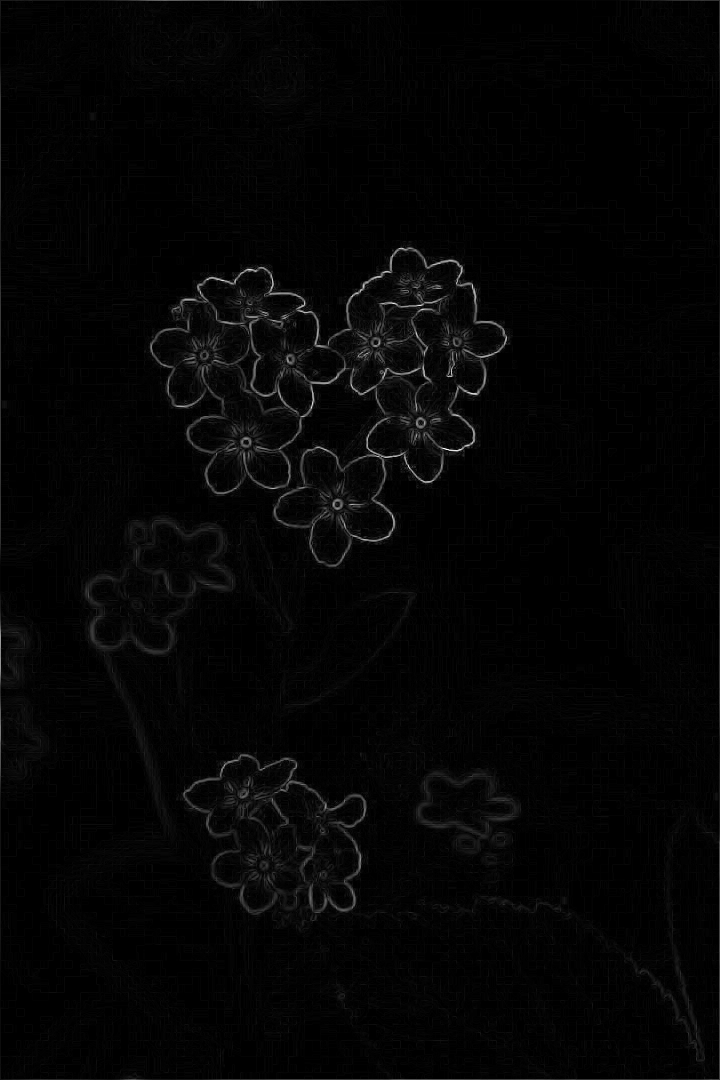

In [22]:
#@title cicek_robert.bmp  dosyasının yeni hali
display(meanimage)

In [24]:
robertimage=Image.open("/content/drive/My Drive/Resource/cicek_robert.bmp")

#Kaydedilen resim dosyası non maxima işleminden geçirmek için açılır. Bu işlem ile kenarlar arasında baskılama yapılır.

image_non=robertimage.load()

newangle = [[0]*hgh for x in range(wdh)]

#Kenar ve açı işlemleri için iki adet resim boyutunda matris oluşturulur.

newedge = [[0]*hgh for x in range(wdh)]

for x in range (1,wdh-1,1):

#Raporda belirtilen Gx ve Gy değerleri için konvolüsyon işlemi yapılmaktadır. Bu işlem ile görüntünün her piksel değeri oluşturduğumuz Robert işleç matrisi ile çarpılıp toplanacaktır. Böylece Gx ve Gy değerini elde ediyoruz.

     for y in range (1,hgh-1,1):

         Gx = (robert_x[0][0] * graylist[x-1][y-1]
               + robert_x[0][1] * graylist[x-1][y]
               + robert_x[0][2] * graylist[x-1][y+1]
               + robert_x[1][0] * graylist[x][y-1]
               + robert_x[1][1] * graylist[x][y]
               + robert_x[1][2] * graylist[x][y+1]
               + robert_x[2][0] * graylist[x+1][y-1]
               + robert_x[2][1] * graylist[x+1][y]
               + robert_x[2][2] * graylist[x+1][y+1])
         Gy = (robert_y[0][0] * graylist[x-1][y-1]
               + robert_y[0][1] * graylist[x-1][y]
               + robert_y[0][2] * graylist[x-1][y+1]
               + robert_y[1][0] * graylist[x][y-1]
               + robert_y[1][1] * graylist[x][y]
               + robert_y[1][2] * graylist[x][y+1]
               + robert_y[2][0] * graylist[x+1][y-1]
               + robert_y[2][1] * graylist[x+1][y]
               + robert_y[2][2] * graylist[x+1][y+1])

         edge = round(math.sqrt((Gx*Gx)+(Gy*Gy)))

#Elde edilen Gx ve Gy değeri kullanılarak kenar formülünü uyguluyoruz.

         thisAngle = math.degrees(math.atan2(Gx, Gy))

#Non maxima işlemi için kullanılan renk açıları bulunmaktadır. 0,45,90,135 açı değerlerini renk tablosunda belirtildiği üzere açı aralığını kontrol ederek açı listesinin değerleri bulunur.

         if ( ( (thisAngle < 22.5) and (thisAngle > -22.5) ) or (thisAngle > 157.5) or            (thisAngle < -157.5) ):
                     newangle[x][y] = 0

         if ( ( (thisAngle > 22.5) and (thisAngle < 67.5) ) or ( (thisAngle < -112.5) or (thisAngle < -157.5) ) ):
                      newangle[x][y] = 45

         if ( ( (thisAngle >67.5) and (thisAngle < 112.5) ) or ( (thisAngle < -67.5) or (thisAngle > -112.5) ) ):
                      newangle[x][y] = 90

         if ( ( (thisAngle > 112.5) and (thisAngle < 157.5) ) or ( (thisAngle < -22.5) and (thisAngle > -67.5) ) ):
                      newangle[x][y] = 135

         edge = int(edge)

         newedge[x][y]=edge

#Sonuç olarak bulunan tüm değerleri integer dönüşümüne tabi tutarak edgelist matrisine topluyoruz.

for p in range(1,wdh-1,1):

#Non Maxima işlemi için gereken komşuluklar kontrol edilir.

     for q in range(1,hgh-1,1):

          if newangle[p][q]==0:

              if (newedge[p][q] <= newedge[p+1][q]) or (newedge[p][q] <=     newedge[p-1][q]):

                    newedge[p][q] = 0

          elif newangle[p][q] == 45:

              if (newedge[p][q] <= newedge[p+1][q+1]) or (newedge[p][q] <= newedge[p-1][q-1]):

                        newedge[p][q] = 0
          elif newangle[p][q] == 90:

              if (newedge[p][q] <= newedge[p][q+1]) or (newedge[p][q] <= newedge[p][q-1]):
                              newedge[p][q] = 0
          else :

              if(newedge[p][q]<=newedge[p-1][q+1]) or (newedge[p][q] <= newedge[p+1][q-1]):

                               newedge[p][q] = 0

          nonmax_value=newedge[p][q]

#Komşuluk değerine göre elde edilen siyah noktalar matris elemanı olarak tutulur.

          image_non[p,q] = (nonmax_value,nonmax_value,nonmax_value)

robertimage.save("/content/drive/My Drive/Resource/cicek_nonmax.bmp")
#Non maxima işleminden geçen resim dosyası belirlenen klasöre kaydedilir.

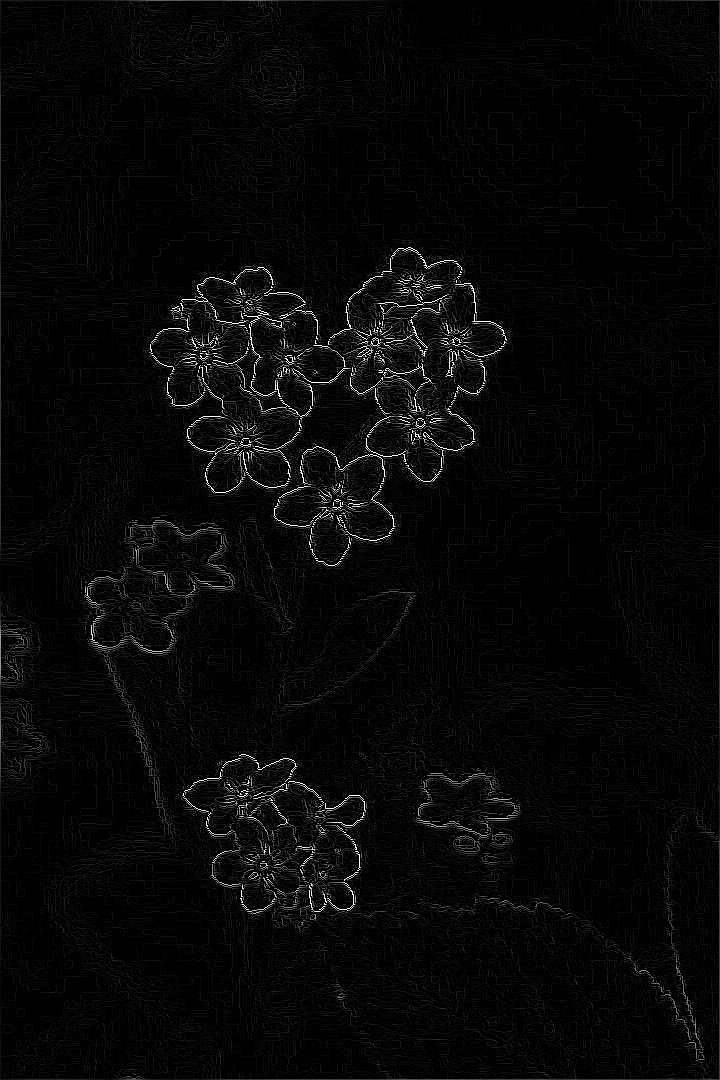

In [25]:
#@title cicek_nonmax.bmp  dosyasının yeni hali
display(robertimage)

In [26]:
maxim=numpy.max(newedge)

#numpy kütüphanesi kullanılarak non maxima işleminde elde edilen değerlerden en yüksek değer seçilir.

thrd_hgh=maxim*0.1

#Seçilen değere göre iki ayrı threshold değeri hesaplanır ve değerlere göre resim dosyasına ikili eşikleme yapılır.

thrd_low=maxim*0.5

high_thres=int(round(thrd_hgh))

low_thres=int(round(thrd_low))

for a in range(1,wdh-1,1):

#Her eleman için kontrol yapılır.

     for b in range (1,hgh-1,1):

          if newedge[a][b] > high_thres:

#Eşik değerinden yüksek olanlar aynen bırakılır.
               newedge[a][b] = newedge[a][b]

          elif (newedge[a][b] > low_thres) and (newedge[a][b] < high_thres):

#İki eşik değerinin arasında olanlar tam bir değere yuvarlanır.

               newedge[a][b] = int(round(newedge[a][b]*0.1))

          else:

               newedge[a][b]=0

          thrd_value=newedge[a][b]

          image_non[a,b]=(thrd_value,thrd_value,thrd_value)

robertimage.save("/content/drive/My Drive/Resource/cicek_thrd.bmp")

#Son olarak resim dosyası proje klasörüne kaydedilir.

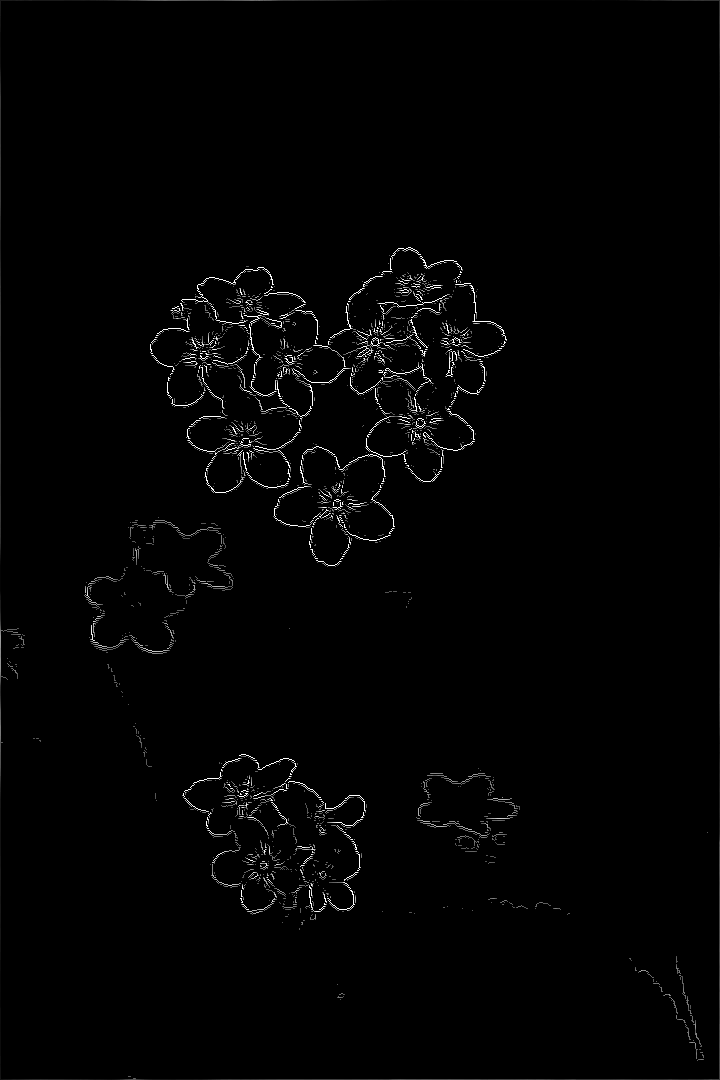

In [27]:
#@title robertimage.bmp  dosyasının yeni hali
display(robertimage)

##1.7. Prewitt İşlecinin Görüntüye Uygulanması

In [28]:
from PIL import Image
import math
import numpy
im = Image.open("/content/drive/My Drive/Resource/cicek.jpg")
pix = im.load()
w = im.size[0]
h = im.size[1]
img = Image.new('RGB', (w, h), "black")
pixels = img.load()


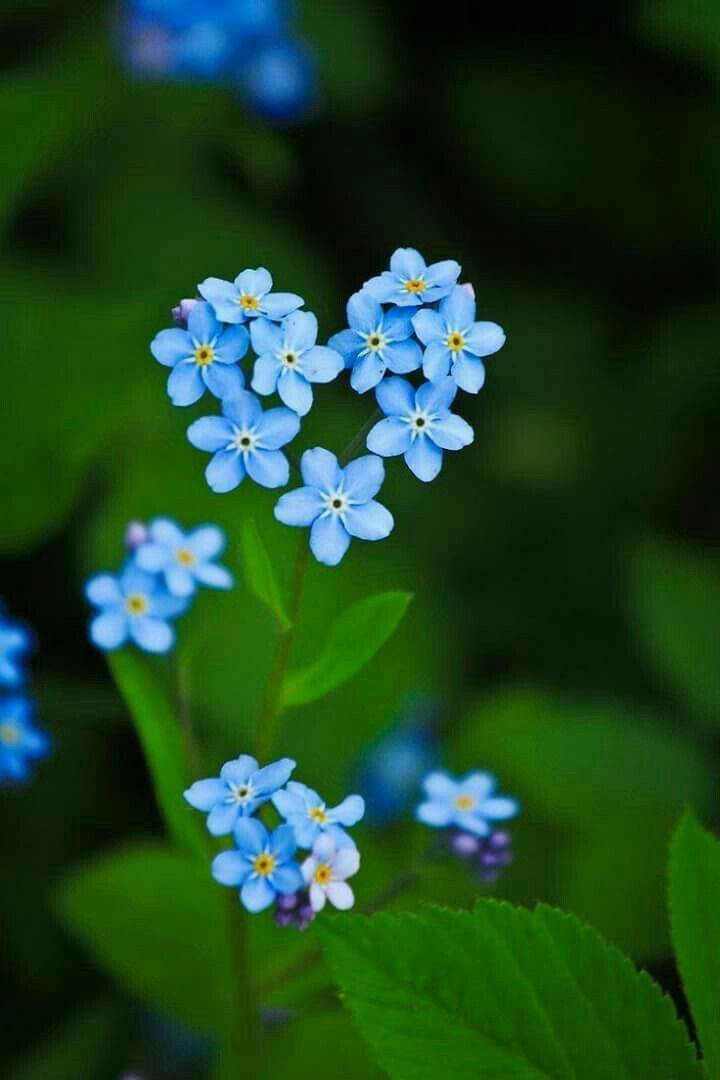

In [29]:
#@title dosyanın orjinal hali
display(im)

In [30]:
graylist = [[0] * h for x in range(w)]
for i in range(w):
   for j in range(h):
       r, g, b = im.getpixel((i, j))
       gray = (int)((r * 0.2126) + (g * 0.7152) + (b * 0.0722))
       graylist[i][j] = gray
       pixels[i, j] = (gray, gray, gray)
for m in range(1, w - 1, 1):
   for n in range(1, h - 1, 1):
       sum = ((graylist[m - 1][n - 1] * 1) + (graylist[m - 1][n] * 2) + (graylist[m - 1][n + 1] * 1) +
       (graylist[m][n - 1] * 2) + (graylist[m][n] * 4) + (graylist[m][n + 1] * 2) +  (graylist[m + 1][n - 1] * 1) + ( graylist[m + 1][n] * 2) + (graylist[m + 1][n + 1] * 1)) / 16
       value = round(sum)
       value = int(value)
       graylist[m][n] = value
       pixels[m, n] = (value, value, value)
prewitt_x = [[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]]
prewitt_y = [[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, -1]]
image = Image.new('RGB', (w, h), "black")
image_pix = image.load()
anglelist = [[0] * h for x in range(w)]
edgelist = [[0] * h for x in range(w)]

for x in range(1, w - 1, 1):
   for y in range(1, h - 1, 1):
       edge_x = (prewitt_x[0][0] * graylist[x - 1][y - 1]) + (prewitt_x[0][1] * graylist[x - 1][y]) + (
                 prewitt_x[0][2] * graylist[x - 1][y + 1]) + (prewitt_x[1][0] * graylist[x][y - 1]) + (
                 prewitt_x[1][1] * graylist[x][y]) + (prewitt_x[1][2] * graylist[x][y + 1]) + (
                 prewitt_x[2][0] * graylist[x + 1][y - 1]) + (prewitt_x[2][1] * graylist[x + 1][y]) + (
                 prewitt_x[2][2] * graylist[x + 1][y + 1])
       edge_y = (prewitt_y[0][0] * graylist[x - 1][y - 1]) + (prewitt_y[0][1] * graylist[x - 1][y])+ (
           prewitt_y[0][2] * graylist[x - 1][y + 1]) + (prewitt_y[1][0] * graylist[x][y - 1]) + (
           prewitt_y[1][1] * graylist[x][y]) + (prewitt_y[1][2] * graylist[x][y + 1]) + (
           prewitt_y[2][0] * graylist[x + 1][y - 1]) + (prewitt_y[2][1] * graylist[x + 1][y]) +(
           prewitt_y[2][2] * graylist[x + 1][y + 1])

       edge = round(math.sqrt((edge_x * edge_x) + (edge_y * edge_y)))
       angle = math.degrees(math.atan2(edge_y, edge_x))

       if (((angle < 22.5) and (angle > -22.5)) or (angle > 157.5) or (angle < -157.5)):
           anglelist[x][y] = 0
       if (((angle > 22.5) and (angle < 67.5)) or ((angle < -112.5) and (angle > -157.5))):
           anglelist[x][y] = 45
       if (((angle > 67.5) and (angle < 112.5)) or ((angle < -67.5) and (angle > -112.5))):
           anglelist[x][y] = 90
       if (((angle > 112.5) and (angle < 157.5)) or ((angle < -22.5) and (angle > -67.5))):
           anglelist[x][y] = 135

       edge = int(edge)
       edgelist[x][y] = edge



In [32]:
for p in range(1, w - 1, 1):
   for q in range(1, h - 1, 1):
       if anglelist[p][q] == 0:
           if (edgelist[p][q] <= edgelist[p + 1][q]) or (edgelist[p][q] <= edgelist[p - 1][q]):
               edgelist[p][q] = 0
       elif anglelist[p][q] == 45:
           if (edgelist[p][q] <= edgelist[p + 1][q + 1]) or (edgelist[p][q] <= edgelist[p - 1][q - 1]):
               edgelist[p][q] = 0
       elif anglelist[p][q] == 90:
           if (edgelist[p][q] <= edgelist[p][q + 1]) or (edgelist[p][q] <= edgelist[p][q - 1]):
               edgelist[p][q] = 0
       else:
           if (edgelist[p][q] <= edgelist[p - 1][q + 1]) or (edgelist[p][q] <= edgelist[p + 1][q - 1]):
               edgelist[p][q] = 0

m = numpy.max(edgelist)
high_thres = m * 0.2
low_thres = m * 0.1
high_thres = int(round(high_thres))
low_thres = int(round(low_thres))
for a in range(1, w - 1, 1):
   for b in range(1, h - 1, 1):
       if edgelist[a][b] > high_thres:
           edgelist[a][b] = edgelist[a][b]
       elif (edgelist[a][b] > low_thres) and (edgelist[a][b] < high_thres):
           edgelist[a][b] = int(round(edgelist[a][b] * 0.1))
       else:
           edgelist[a][b] = 0
       e = edgelist[a][b]
       image_pix[a, b] = (e, e, e)
image.save("/content/drive/My Drive/Resource/cicek_prewitt.bmp")


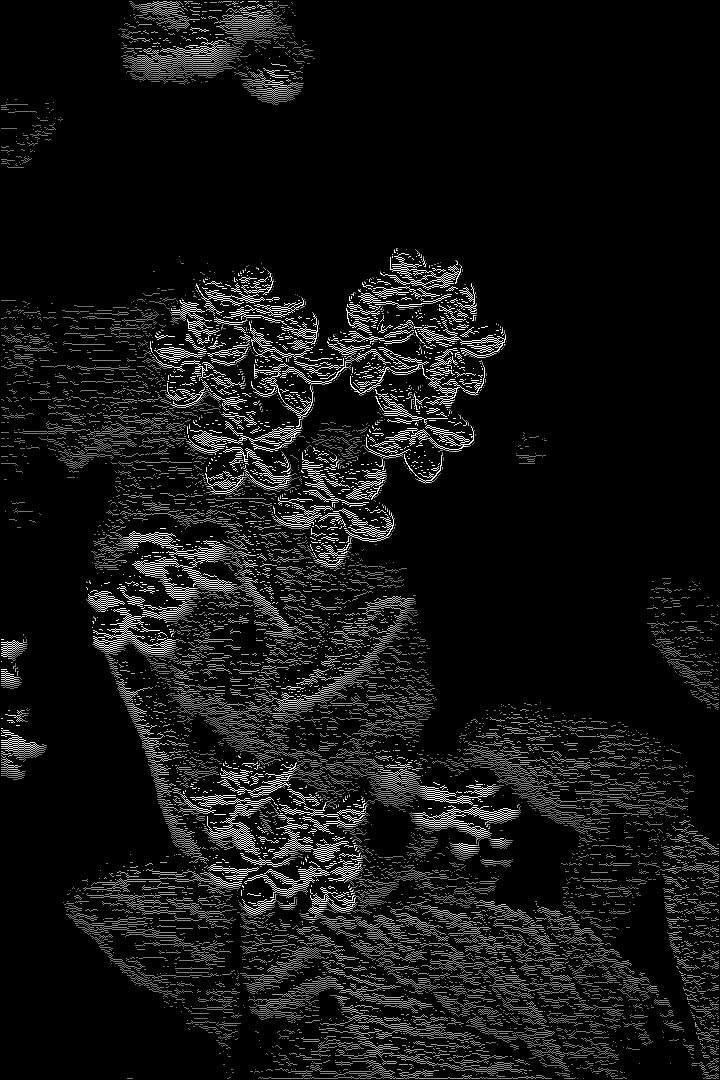

In [33]:
#@title cicek_prewitt.bmp dosyası
display(image)

##1.8. Sobel İşlecinin Görüntüye Uygulanması

In [34]:
from PIL import Image
import math
import numpy
img = Image.open("/content/drive/My Drive/Resource/cicek.jpg")

width = img.size[0]
height = img.size[1]


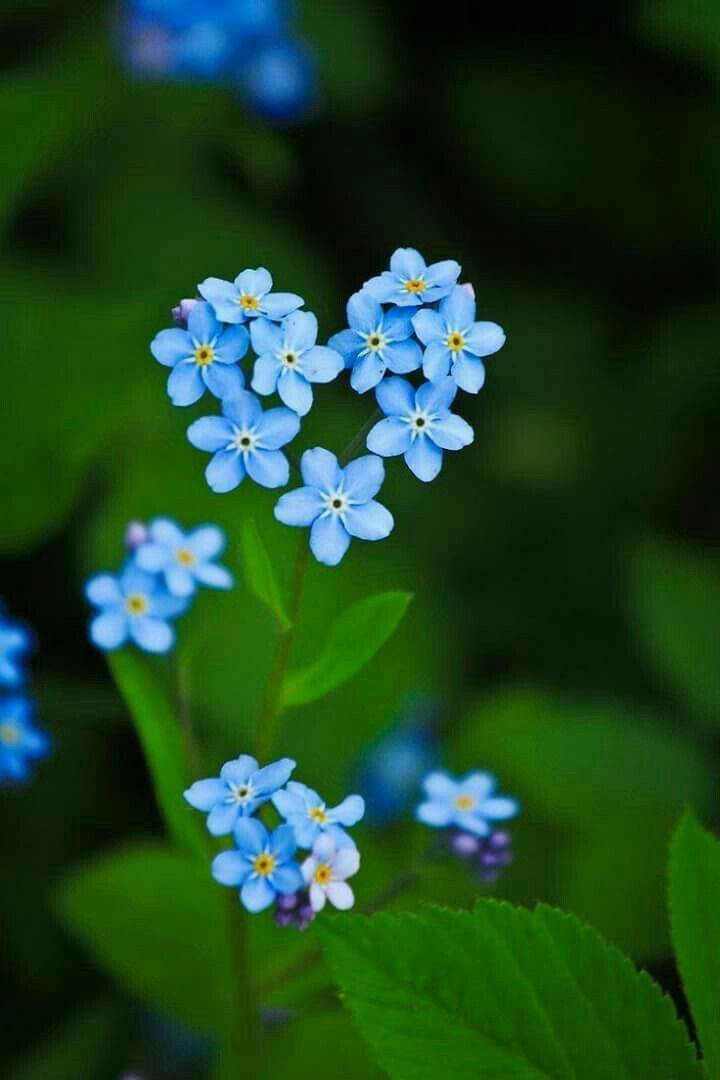

In [35]:
#@title dosyanın orjinal hali
display(img)

In [36]:
newimg = Image.new("RGB", (width, height), "white")
for x in range(1, width-1):
    for y in range(1, height-1):

        #her piksel için Gx'i 0'a ve Gy'yi 0'a ilklendir
        Gx = 0
        Gy = 0

        # üst sol piksel
        r,g,b = img.getpixel((x-1, y-1))

        # yoğunluğu 0 ile 765 arasındadır (255 * 3)
        intensity = r + g + b

        # değeri Gx ve Gy'de biriktirir
        Gx += -intensity
        Gy += -intensity

        # kalan sol sütun
        r,g,b = img.getpixel((x-1, y))

        Gx += -2 * (r + g + b)

        r,g,b = img.getpixel((x-1, y+1))

        Gx += -(r + g + b)
        Gy += (r + g + b)

        # orta piksel
        r,g,b = img.getpixel((x, y-1))


        Gy += -2 * (r + g + b)

        r,g,b = img.getpixel((x, y+1))


        Gy += 2 * (r + g + b)

        # right column
        r,g,b = img.getpixel((x+1, y-1))

        Gx += (r + g + b)
        Gy += -(r + g + b)

        r,g,b = img.getpixel((x+1, y))

        Gx += 2 * (r + g + b)

        r,g,b = img.getpixel((x+1, y+1))

        Gx += (r + g + b)
        Gy += (r + g + b)

        # gradyanın uzunluğunu hesaplar (Pisagor teoremi)
        length = math.sqrt((Gx * Gx) + (Gy * Gy))

        # gradyanın uzunluğunu 0 ila 255 aralığına normalleştirir
        length = length / 4328 * 255

        length = int(length)

        # kenar görüntüdeki uzunluğu çizin

        newimg.putpixel((x,y),(length,length,length))

newimg.save("/content/drive/My Drive/Resource/new_sobel.bmp")

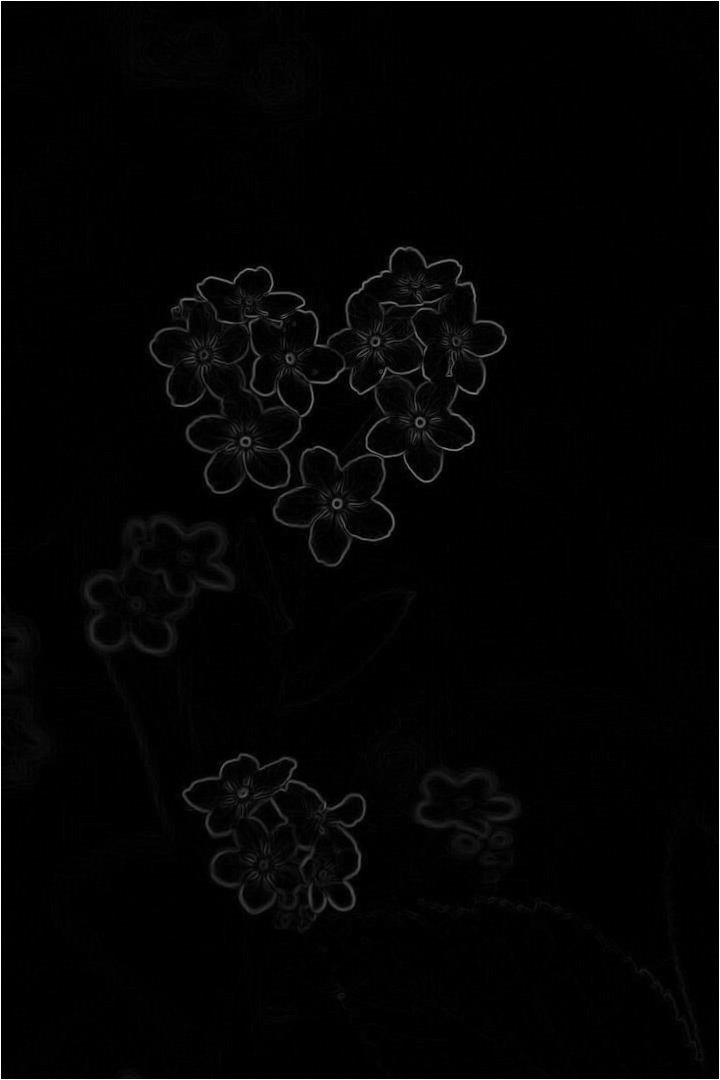

In [37]:
#@title new_sobel.bmp dosyası
display(newimg)

##1.9. Robert İşlecinin Görüntüye Uygulanması

In [38]:
from PIL import Image
import math
import numpy

image = Image.open("/content/drive/My Drive/Resource/cicek.jpg")
newmat = image.load()
wdh=image.size[0]
hgh=image.size[1]


In [39]:
graylist=[[0]*hgh for x in range(wdh)]
for k in range(wdh):
   for l in range(hgh):
       r, g, b = image.getpixel((k, l))
       gray=(int)((r*0.2126)+(g*0.7152)+(b*0.0722))
       graylist[k][l]=gray
       newmat[k,l]=(gray,gray,gray)

meanArray=[[0]*hgh for x in range(wdh)]

for i in range (1,hgh-1):
   for j in range (1,wdh-1):
       meanArray[j][i] = (graylist[j][i - 1]
           + graylist[j][i + 1]
           + graylist[j][i]
           + graylist[j - 1][ i - 1]
           + graylist[j - 1][i + 1]
           + graylist[j - 1][ i]
           + graylist[j + 1][i - 1]
           + graylist[j + 1][i + 1]
           + graylist[j + 1][ i] ) / 9;
       mean_value=(int)(round(meanArray[j][i]))
       newmat[j,i] = (mean_value,mean_value,mean_value)

robertArray=[[0]*hgh for x in range(wdh)]
robert_x=[[2,1,0],
        [1,0,-1],
        [0,-1,-2]]
robert_y=[[0,-1,-2],
        [1,0,-1],
        [2,1,0]]

for m in range (1,hgh-1):
   for n in range (1,wdh-1):
       robertArray[n][m]=(int)(math.fabs(graylist[n][m] - graylist[n - 1][m - 1])) + (int)(math.fabs(graylist[n][m - 1] - graylist[n - 1][m]))
       rbrt_value=int(round(robertArray[n][m]))
       newmat[n,m] = (rbrt_value,rbrt_value,rbrt_value)

newangle=[[0]*hgh for x in range(wdh)]
newedge=[[0]*hgh for x in range(wdh)]
for x in range (1,wdh-1,1):
   for y in range (1,hgh-1,1):
       Gx = (robert_x[0][0] * graylist[x-1][y-1]
           + robert_x[0][1] * graylist[x-1][y]
           + robert_x[0][2] * graylist[x-1][y+1]
           + robert_x[1][0] * graylist[x][y-1]
           + robert_x[1][1] * graylist[x][y]
           + robert_x[1][2] * graylist[x][y+1]
           + robert_x[2][0] * graylist[x+1][y-1]
           + robert_x[2][1] * graylist[x+1][y]
           + robert_x[2][2] * graylist[x+1][y+1])

       Gy = (robert_y[0][0] * graylist[x-1][y-1]
           + robert_y[0][1] * graylist[x-1][y]
           + robert_y[0][2] * graylist[x-1][y+1]
           + robert_y[1][0] * graylist[x][y-1]
           + robert_y[1][1] * graylist[x][y]
           + robert_y[1][2] * graylist[x][y+1]
           + robert_y[2][0] * graylist[x+1][y-1]
           + robert_y[2][1] * graylist[x+1][y]
           + robert_y[2][2] * graylist[x+1][y+1])

       edge=round(math.sqrt((Gx*Gx)+(Gy*Gy)))
       thisAngle=math.degrees(math.atan2(Gx, Gy))

       if ( ( (thisAngle < 22.5) and (thisAngle > -22.5) ) or (thisAngle > 157.5) or (thisAngle < -157.5) ):
               newangle[x][y] = 0
       if ( ( (thisAngle > 22.5) and (thisAngle < 67.5) ) or ( (thisAngle < -112.5) or (thisAngle > -157.5) ) ):
               newangle[x][y] = 45
       if ( ( (thisAngle > 67.5) and (thisAngle < 112.5) ) or ( (thisAngle < -67.5) or (thisAngle > -112.5) ) ):
               newangle[x][y] = 90
       if ( ( (thisAngle > 112.5) and (thisAngle < 157.5) ) or ( (thisAngle < -22.5) and (thisAngle > -67.5) ) ):
               newangle[x][y] = 135

       edge=int(edge)
       newedge[x][y]=edge

for p in range(1,wdh-1,1):
   for q in range(1,hgh-1,1):
       if newangle[p][q]==0:
           if(newedge[p][q] <= newedge[p+1][q]) or (newedge[p][q] <= newedge[p-1][q]):
               newedge[p][q] = 0
       elif newangle[p][q] == 45:
           if(newedge[p][q] <= newedge[p+1][q+1]) or (newedge[p][q] <= newedge[p-1][q-1]):
               newedge[p][q] = 0
       elif newangle[p][q] == 90:
           if(newedge[p][q] <= newedge[p][q+1]) or (newedge[p][q] <= newedge[p][q-1]):
               newedge[p][q] = 0
       else :
           if(newedge[p][q]<=newedge[p-1][q+1]) or (newedge[p][q] <= newedge[p+1][q-1]):
               newedge[p][q] = 0
       nonmax_value=newedge[p][q]
       newmat[p,q] = (nonmax_value,nonmax_value,nonmax_value)
maxim=numpy.max(newedge)
thrd_hgh=maxim*0.1
thrd_low=maxim*0.5
high_thres=int(round(thrd_hgh))
low_thres=int(round(thrd_low))
for a in range(1,wdh-1,1):
   for b in range (1,hgh-1,1):
       if newedge[a][b] > high_thres:
           newedge[a][b] = newedge[a][b]
       elif (newedge[a][b] > low_thres) and (newedge[a][b] < high_thres):
           newedge[a][b] = int(round(newedge[a][b]*0.1))
       else:
           newedge[a][b]=0
       thrd_value=newedge[a][b]
       newmat[a,b]=(thrd_value,thrd_value,thrd_value)
image.save("/content/drive/My Drive/Resource/cicek_Robert.png")




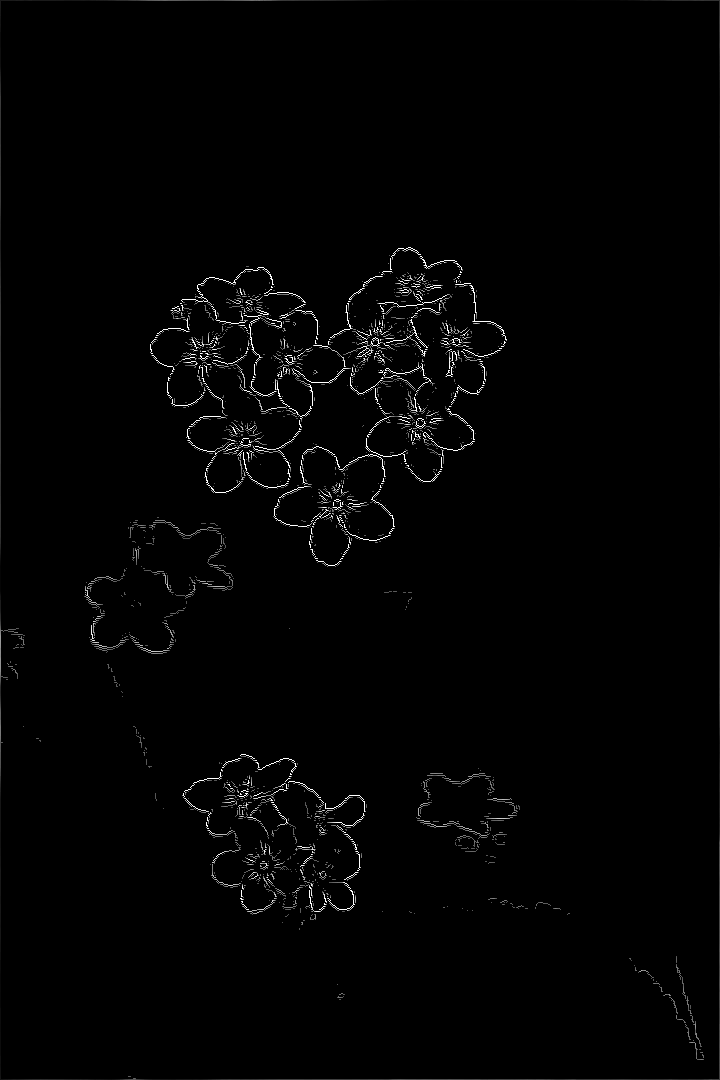

In [40]:
#@title cicek_Robert.png dosyası
display(image)